In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [1]:
import os

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [14]:

# Define the directory path
data_dir = 'D:/B Tech/IV Year/capstone2/dataset/'

# Define the batch size
batch_size = 32

# Define the image size
image_size = (222, 222)


In [20]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

# Load and split the data into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [21]:

# Create the CNN model (same as before)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


In [22]:

# Compile the model (same as before)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (same as before)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20
105/105 [==============================] - 522s 5s/step - loss: 1.2535 - accuracy: 0.4010 - val_loss: 1.3039 - val_accuracy: 0.3942
Epoch 2/20
105/105 [==============================] - 323s 3s/step - loss: 0.9601 - accuracy: 0.5505 - val_loss: 1.5260 - val_accuracy: 0.4014
Epoch 3/20
105/105 [==============================] - 327s 3s/step - loss: 0.8968 - accuracy: 0.5921 - val_loss: 1.3551 - val_accuracy: 0.4123
Epoch 4/20
105/105 [==============================] - 316s 3s/step - loss: 0.8441 - accuracy: 0.6208 - val_loss: 1.4725 - val_accuracy: 0.4387
Epoch 5/20
105/105 [==============================] - 281s 3s/step - loss: 0.8072 - accuracy: 0.6423 - val_loss: 1.6328 - val_accuracy: 0.4062
Epoch 6/20
105/105 [==============================] - 308s 3s/step - loss: 0.8002 - accuracy: 0.6468 - val_loss: 1.3940 - val_accuracy: 0.4435
Epoch 7/20
105/105 [==============================] - 322s 3s/step - loss: 0.7673 - accuracy: 0.6684 - val_loss: 1.2857 - val_accuracy: 0.4627

In [28]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(train_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 560s 5s/step - loss: 0.6101 - accuracy: 0.7382
Test Loss: 0.6101059913635254
Test Accuracy: 0.7381516695022583


In [24]:

# Save the model (same as before)
model.save("eye_disease_model.h5")


C:\Users\lant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


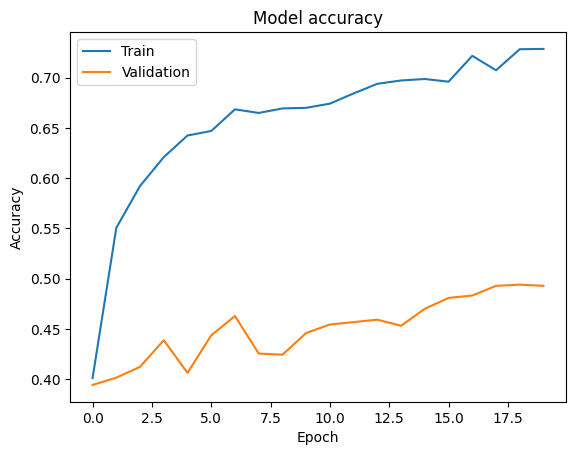

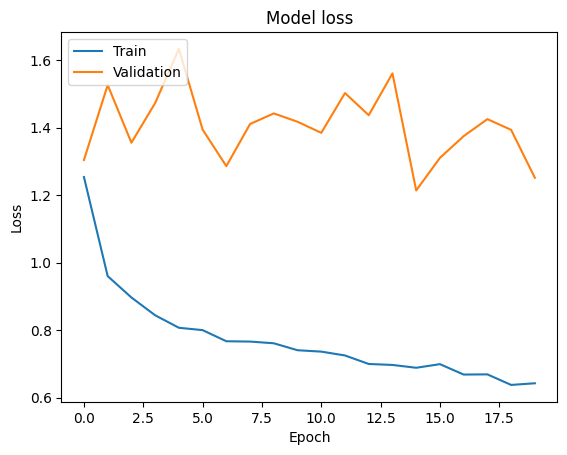

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model("eye_disease_model.h5")

# Define the class labels
class_labels = ['cataract', 'glaucoma', 'normal', 'diabetic_retinopathy']

# Load and preprocess the image you want to predict
img_path = 'D:/B Tech/IV Year/capstone2/dataset/cataract/_0_4015166.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(image_size[0], image_size[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize pixel values

# Make prediction
predictions = model.predict(img_array)

# Get the predicted class label
predicted_label_index = np.argmax(predictions[0])
predicted_label = class_labels[predicted_label_index]

print("Predicted class:", predicted_label)


1/1 [==============================] - 21s 21s/step
Predicted class: cataract


In [5]:
from flask import Flask, request, render_template
import numpy as np
from tensorflow.keras.preprocessing import image

app = Flask(__name__)

# Load the saved model
model = tf.keras.models.load_model("eye_disease_model.h5")

# Define the class labels
class_labels = ['cataract', 'glaucoma', 'normal', 'diabetic_retinopathy']

# Define the image size
image_size = (222, 222)

@app.route('/')
def upload_file():
    return render_template('upload.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Get the uploaded image file
        img_file = request.files['image']
        
        # Check if the file is empty
        if img_file.filename == '':
            return render_template('upload.html', prediction_text='No image selected')
        
        # Read and preprocess the image
        img = image.load_img(img_file, target_size=(image_size[0], image_size[1]))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize pixel values
        
        # Make prediction
        predictions = model.predict(img_array)
        
        # Get the predicted class label
        predicted_label_index = np.argmax(predictions[0])
        predicted_label = class_labels[predicted_label_index]
        
        return render_template('upload.html', prediction_text='Predicted class: {}'.format(predicted_label))

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [2]:
from flask import Flask, render_template, request, jsonify
import numpy as np
from tensorflow.keras.preprocessing import image


In [3]:
import tensorflow as tf

In [3]:

app = Flask(__name__)

model = tf.keras.models.load_model("eye_disease_model.h5")  # Load your pre-trained model here
class_labels = ['cataract', 'glaucoma', 'normal', 'diabetic_retinopathy']

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    img = image.load_img(file, target_size=(222, 222))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_label_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_label_index]

    return jsonify({'predicted_class': predicted_class})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\lant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
import logging
from flask import Flask

app = Flask(__name__)

# Configure logging
logging.basicConfig(level=logging.INFO)  # Set logging level to INFO

@app.route('/')
def index():
    app.logger.info('Hello, logging!')
    return 'Hello, World!'

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
INFO:werkzeug:Press CTRL+C to quit
 * Restarting with stat
INFO:werkzeug: * Restarting with stat


SystemExit: 1